# **Logistic Regression**

-----------------------
## **Objective**
-----------------------

* To Identify Iris data using multinomial logistic regression, using only 2 features.

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **id** - Unique iris flower Identifier
* **sepal length** - Length of the flower sepal
* **sepal width** - Width of the flower sepal
* **petal length** - Length of the flower petal
* **petal width** - Width of the flower petal
* **class** - class of iris flower: Iris Setosa, Iris Versicolour, or Iris Virginica

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

##Loading the Dataset

In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/iris.csv", encoding="utf-8")
data.loc[:4]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Loading the features and labesl into X and y variables
Features = ['PetalLength', 'PetalWidth']
encoder = LabelEncoder()
X = data[ Features ].values # numpy array
encoder.fit(data.Name)

# Applying encoder.classes_ to ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
y_set = encoder.transform(encoder.classes_)
y = encoder.transform(data.Name)

In [ ]:
# Let's take a glimpse of the data
print("X:", X[:5])
print("y:", y[:5])

X: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
y: [0 0 0 0 0]


## Training Logistic Regression model

In [ ]:
# Multinomial Logistic Regression (C: Regularization Parameter)
clf = LogisticRegression(solver='liblinear', C=1e+2, multi_class='auto')
clf.fit(X,y)

LogisticRegression(C=100.0, solver='liblinear')

In [ ]:
# Function to output confusion matrix
def conf_matrix(X,y,clf):
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred, labels=y_set)
    return acc, cm

In [ ]:
# Making sure that my function works
print(conf_matrix(X,y,clf)[0])
print(conf_matrix(X,y,clf)[1])

0.96
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


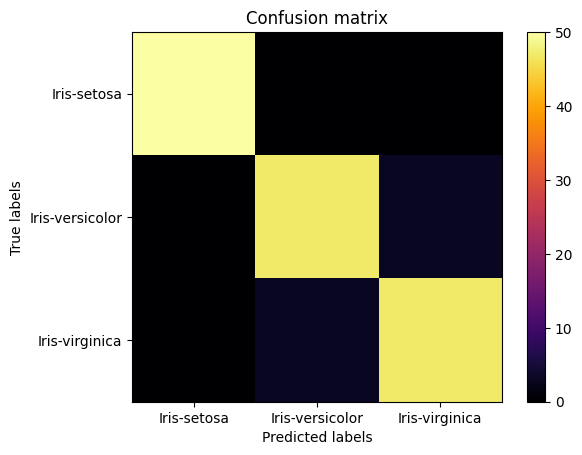

In [ ]:
# Plotting the Confusion Matrix as a Heatmap
# Specifying what to display on xticks and yticks
plt.xticks( [0,1,2], encoder.inverse_transform(y_set) )
plt.yticks( [0,1,2], encoder.inverse_transform(y_set) )
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Displaying the plot
plt.imshow(conf_matrix(X,y,clf)[1],  cmap=plt.cm.inferno)

# Displaying the colorbar
plt.colorbar()

## Plotting the Classification Boundary

In [ ]:
def Classification_Boundary(n, X):
    # Divide the range from 0 to 10 into n segments
    xmin_0, xmax_0 = X[:,0].min(), X[:,0].max()
    xmin_1, xmax_1 = X[:,1].min(), X[:,1].max()
    x0_ = np.linspace(xmin_0, xmax_0, n)
    x1_ = np.linspace(xmin_1, xmax_1, n)

    # Creating a grid
    x0, x1 = np.meshgrid(x0_,x1_) # Creating an n x n grid
    Xgrid = np.column_stack( [x0.ravel(), x1.ravel()] ) # Flattening the grid using numpy.ravel()
    z=0
    z = clf.predict(Xgrid)
    z = z.reshape(x0.shape) # Reshape it for plotting to n x n

    y_pred = clf.predict(X)

    # Specifying the figure size (width, height)
    plt.figure( figsize=(5,5) )

    # Set the min and max values for x and y axes
    plt.xlim(xmin_0, xmax_0)
    plt.ylim(xmin_1, xmax_1)

    # Set the title and labels for x and y axes
    plt.title('contour'), plt.xlabel(Features[0]), plt.ylabel(Features[1])

    # Plot contour lines with alpha for transparency and cmap for colormap
    plt.contourf(x0, x1, z, alpha=0.9, cmap='viridis_r')
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='inferno', marker='o' )

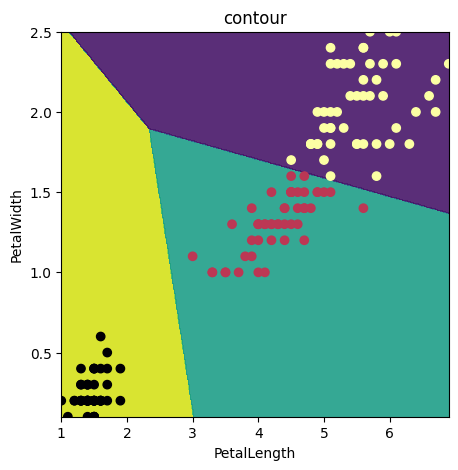

In [ ]:
Classification_Boundary(500, X)